In [29]:
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
# Credit: http://norvig.com/sudoku.html
def cross(A, B):
    "Cross product of elements in A and elements in B."
    return [a+b for a in A for b in B]

digits   = '123456789'
rows     = 'ABCDEFGHI'
cols     = digits
squares  = cross(rows, cols)
unitlist = (
    [cross(rows, c) for c in cols] +
    [cross(r, cols) for r in rows] +
    [cross(rs, cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')])
units = dict(
    (s, [u for u in unitlist if s in u]) for s in squares
)
peers = dict(
    (s, set(sum(units[s],[]))-set([s])) for s in squares
)

In [31]:
def make_sudoku(puzzle):
    return {square: number for square, number in zip(squares, puzzle)}

In [32]:
# note that '0' is a placeholder for an empty cell
puzzle = '003020600900305001001806400008102900700000008006708200002609500800203009005010300'
grid = make_sudoku(puzzle)

In [33]:
def display(grid):
    # Credit: http://norvig.com/sudoku.html
    width = 1+max(len(grid[s]) for s in squares)
    line = '+'.join(['-'*(width*3)]*3)
    for r in rows:
        print(
            ''.join(grid[r+c].center(width)+('|' if c in '36' else '') for c in cols)
        )
        if r in 'CF': 
            print(line)

In [34]:
display(grid)

0 0 3 |0 2 0 |6 0 0 
9 0 0 |3 0 5 |0 0 1 
0 0 1 |8 0 6 |4 0 0 
------+------+------
0 0 8 |1 0 2 |9 0 0 
7 0 0 |0 0 0 |0 0 8 
0 0 6 |7 0 8 |2 0 0 
------+------+------
0 0 2 |6 0 9 |5 0 0 
8 0 0 |2 0 3 |0 0 9 
0 0 5 |0 1 0 |3 0 0 


We begin with a sudoku puzzle in the form of a grid of values. Each row has an alphabetic value (`A`, `B`, `C`, ..., `I`), and each columns a numeric (`1`, `2`,..., `9`), such that the element in the top left has the coordinates `A1`, the element directly to its right, `A2`, the element directly under is has the coordinates `B1`, and so on and so forth.

For example, the value of `A1` is zero, `B1` is $9$, and `C7` is $4$.

We will now turn this grid into a graph, where each node will be a cell, and two cells are connected if they are `peers`. This means, they are connected if they belong to the same row, column, or block.

In [121]:
def make_sudoku_graph(peers):
    g = nx.Graph()
    g.add_nodes_from(peers.keys())
    for k, v in peers.items():
        g.add_edges_from(([(k, t) for t in v]))
    return g

In [122]:
G = make_sudoku_graph(peers)

In [123]:
COLOURS = {
    '0':'white',
    '1':'blue',
    '2':'red',
    '3':'green',
    '4':'yellow',
    '5':'purple',
    '6':'orange',
    '7':'grey',
    '8':'brown',
    '9':'pink'
}

In [124]:
def get_init_node_colouring(G, grid):
    color_map = []
    for node in grid.values():
        color_map.append(COLOURS[node])
    return color_map

In [125]:
node_colour_map = get_init_node_colouring(G, grid)

In [126]:
def plot_init_colours(G, color_map):
    fig, ax = plt.subplots(figsize=(20,10))
    nx.draw(G, node_color=color_map, with_labels=True, ax=ax)
    plt.show()

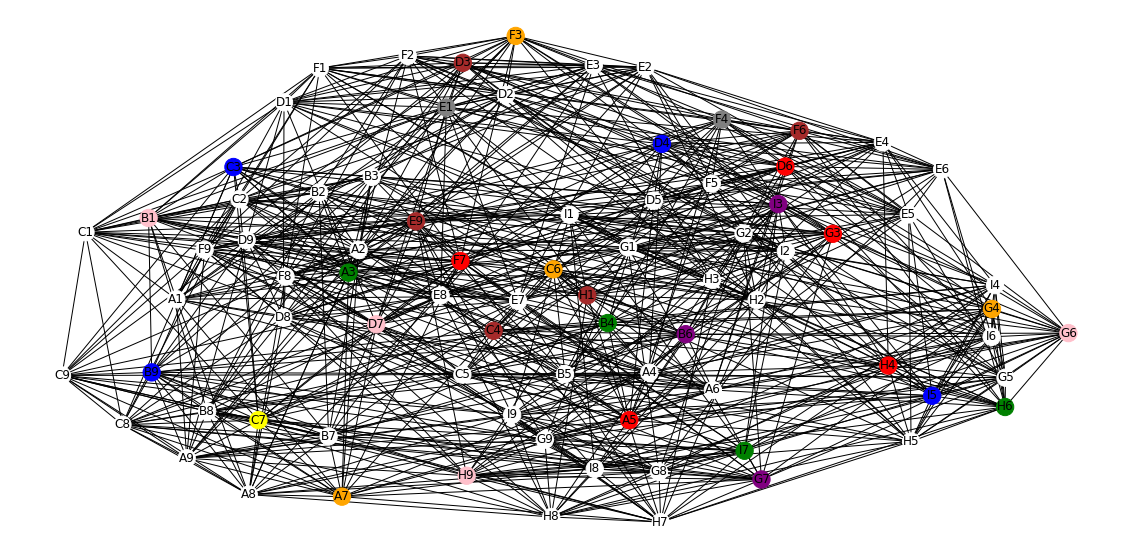

In [127]:
plot_init_colours(G, node_colour_map)

The problem of solving the sudoku is now reduced to the problem of colouring this graph with nine different colours such that no two connected vertices have the same colour. Each colour represents a number, and so the numerical solution can be directly read off the coloured graph. In the graph above, nodes that remain to be coloured - those empty cells in the grid - are white.

In [131]:
node_colours = {
    cell: COLOURS[value] for cell, value in grid.items() if COLOURS[value] is not 'white'
}

We now implement a greedy colouring algorithm. Note that this will not necessarily return a globally optimal solution to the problem.

In [132]:
def coloring(node, color):
    for neighbor in G.neighbors(node):
        color_of_neighbor = node_colours.get(neighbor, None)
        if color_of_neighbor == color:
            return False
    return True

In [133]:
def get_color_for_node(node):
    for color in COLOURS.values():
        if coloring(node, color):
            return color

In [134]:
def colour_graph():
    for node in G.nodes():
        node_colours[node] = get_color_for_node(node)
    return node_colours

**TODO:** 
1. Implement more efficient graph colouring algorithm
2. Translate graph colourings back to sudoku (how expensive is the translation part (sudoku -> graph, graph -> sudoku) of this procedure?)